# Import and store the data in a data frame

In [1]:
import pandas as pd
dataset = pd.read_csv('airline.csv')
dataset.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share1,Average fare,Low price airline,market share2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
market share1                1000 non-null float64
Average fare                 1000 non-null float64
Low price airline            1000 non-null object
market share2                1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [3]:
dataset.describe()

,Average Fare,Distance,Average weekly passengers,market share1,Average fare,market share2,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


# Remove the outliers from the data

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

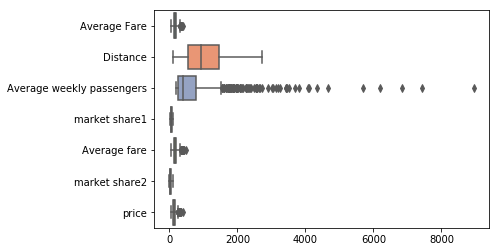

In [5]:
sns.boxplot(data=dataset, orient="h", palette="Set2")

In [6]:
dataset.columns

Index(['City1', 'City2', 'Average Fare', 'Distance',
       'Average weekly passengers', 'market leading airline', 'market share1',
       'Average fare', 'Low price airline', 'market share2', 'price'],
      dtype='object')

In [7]:
dataset = dataset[['Average Fare', 'Distance', 'Average weekly passengers', 'market share1',
       'Average fare', 'market share2', 'price']]

In [8]:
Q1 = dataset[['Average Fare', 'Distance', 'Average weekly passengers', 'market share1',
       'Average fare', 'market share2', 'price']].quantile(0.25)
Q3 = dataset[['Average Fare', 'Distance', 'Average weekly passengers', 'market share1',
       'Average fare', 'market share2', 'price']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

dataset = dataset[~((dataset[['Average Fare', 'Distance', 'Average weekly passengers', 'market share1',
       'Average fare', 'market share2', 'price']] < (Q1 - 1.5 * IQR)) |(dataset[['Average Fare', 'Distance', 'Average weekly passengers', 'market share1',
       'Average fare', 'market share2', 'price']] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dataset.shape)

Average Fare                  71.4175
Distance                     899.0000
Average weekly passengers    512.7150
market share1                 27.0000
Average fare                  78.8925
market share2                 39.7775
price                         54.7625
dtype: float64
(885, 7)


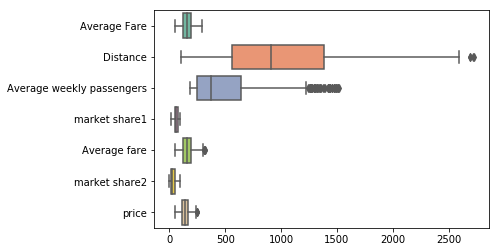

In [9]:
sns.boxplot(data=dataset, orient="h", palette="Set2")

In [10]:
dataset.head()

,Average Fare,Distance,Average weekly passengers,market share1,Average fare,market share2,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


# Drop the independent variables which has less than 0.1 correlation with the dependent variable 

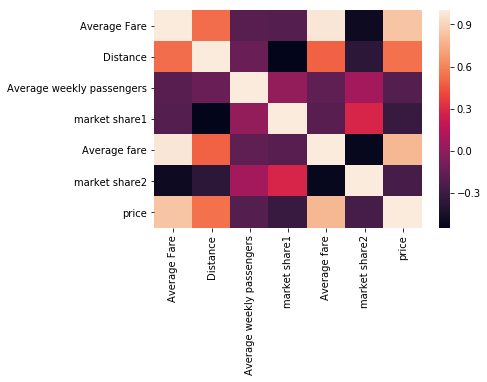

In [11]:
sns.heatmap(dataset.corr())

In [12]:
dataset.corr().abs()

,Average Fare,Distance,Average weekly passengers,market share1,Average fare,market share2,price
Average Fare,1.000000,0.522650,0.197005,0.207955,0.979713,0.493555,0.840993
Distance,0.522650,1.000000,0.129632,0.547952,0.489721,0.361519,0.539894
Average weekly passengers,0.197005,0.129632,1.000000,0.021769,0.163736,0.076176,0.209018
market share1,0.207955,0.547952,0.021769,1.000000,0.193382,0.281182,0.314555
Average fare,0.979713,0.489721,0.163736,0.193382,1.000000,0.519442,0.794157
market share2,0.493555,0.361519,0.076176,0.281182,0.519442,1.000000,0.260912
price,0.840993,0.539894,0.209018,0.314555,0.794157,0.260912,1.000000


Since correlation of columns are greater than 0.1, we are not going to drop any coulmn

# Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)

In [13]:
X = dataset.drop(['Average Fare'], axis=1)
y = dataset['Average Fare']

In [14]:
X.columns

Index(['Distance', 'Average weekly passengers', 'market share1',
       'Average fare', 'market share2', 'price'],
      dtype='object')

# Create scatter Plot of Independent Variable vs Dependent Variable

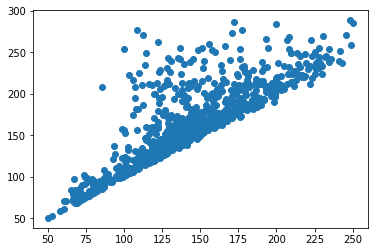

In [15]:
plt.scatter(X["price"], dataset["Average Fare"])

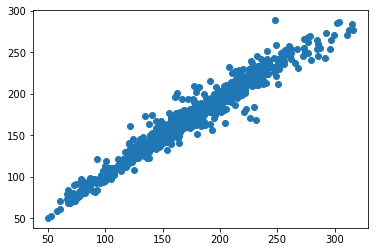

In [16]:
plt.scatter(X["Average fare"], dataset["Average Fare"])

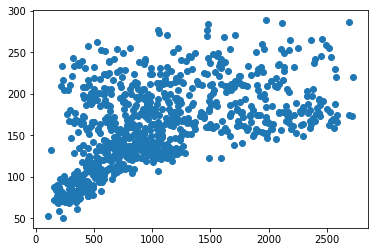

In [17]:
plt.scatter(X["Distance"], dataset["Average Fare"])

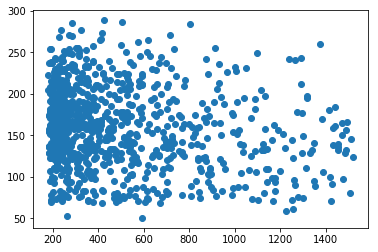

In [18]:
plt.scatter(X["Average weekly passengers"], dataset["Average Fare"])

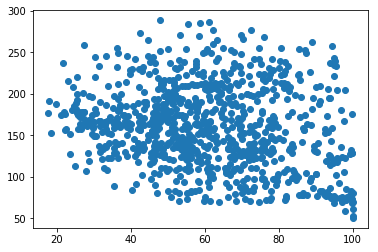

In [19]:
plt.scatter(X["market share1"], dataset["Average Fare"])

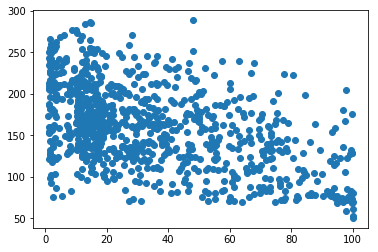

In [20]:
plt.scatter(X["market share2"], dataset["Average Fare"])

# Divide the data set into training and test data set and build a Multiple Linear Regression model.

In [21]:
X = pd.get_dummies(dataset)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Print the coefficients & intercepts of the linear regression model

In [24]:
print("The intercepts for {}".format(model.intercept_))
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))
    print("The coefficient for {} is {}".format(col_name, model.intercept_))

The intercepts for 1.1368683772161603e-13
The coefficient for Average Fare is 1.0
The coefficient for Average Fare is 1.1368683772161603e-13
The coefficient for Distance is -4.845125284438714e-17
The coefficient for Distance is 1.1368683772161603e-13
The coefficient for Average weekly passengers is -1.504553375162438e-16
The coefficient for Average weekly passengers is 1.1368683772161603e-13
The coefficient for market share1 is -2.772957555387781e-17
The coefficient for market share1 is 1.1368683772161603e-13
The coefficient for Average fare is -6.666831492913822e-17
The coefficient for Average fare is 1.1368683772161603e-13
The coefficient for market share2 is -1.0389763303867331e-17
The coefficient for market share2 is 1.1368683772161603e-13
The coefficient for price is 7.6570324551089e-17
The coefficient for price is 1.1368683772161603e-13


# Print the accuracy of the overall model

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error
print('Accuracy Score is', model.score(X_test, y_test))
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE - ', mse)
print('RMSE - ', np.sqrt(mse))
print('R2 - ', np.sqrt(np.sqrt(mse)))

Accuracy Score is 1.0
MSE -  3.5360935202801836e-27
RMSE -  5.946506134092677e-14
R2 -  2.4385459056767166e-07
